In [1]:
import numpy as np
import pandas as pd
from astropy.io.misc.hdf5 import read_table_hdf5
import matplotlib.pyplot as pl
import ob

In [2]:
pl.rcParams["font.family"] = "serif"
pericenter = pd.read_hdf("data_pericenters.h5")
vfunc = np.vectorize(ob.cvtSnapshot)

In [3]:
m12i_data = pd.read_hdf("Orientations_z/data_obliquityAngles_z_m12i_res7100.h5")
m12f_data = pd.read_hdf("Orientations_z/data_obliquityAngles_z_m12f_res7100.h5")
m12w_data = pd.read_hdf("Orientations_z/data_obliquityAngles_z_m12w_res7100.h5")
m12m_data = pd.read_hdf("Orientations_z/data_obliquityAngles_z_m12m_res7100.h5")

In [4]:
m12i_time = vfunc(m12i_data["snapshot"])
m12f_time = vfunc(m12f_data["snapshot"])
m12w_time = vfunc(m12w_data["snapshot"])
m12m_time = vfunc(m12m_data["snapshot"])

In [ ]:
# fig, ax = pl.subplots(2, 2, dpi=200, sharex=True, sharey=True, figsize=(7,4))
fig, ax = pl.subplots(2, 2, dpi=200, sharex=True, sharey=True, figsize=(10, 4))

((ax_f, ax_i), (ax_w, ax_m)) = ax

ax_i.plot(
    m12i_time,
    m12i_data["disk"],
    c="b",
    alpha=0.25,
    label="Stellar Disk ($R_{*,90}$)",
    lw=3,
)
ax_i.plot(
    m12i_time, m12i_data["5.disk"], c="b", alpha=0.5, label="5$ \\times R_{*,90}$", lw=3
)
ax_i.plot(
    m12i_time, m12i_data["virial"], c="b", label="Virial Radius $(R_{200})$", lw=3
)

ax_f.plot(
    m12f_time,
    m12f_data["disk"],
    c="b",
    alpha=0.25,
    label="Stellar Disk ($R_{*,90}$)",
    lw=3,
)
ax_f.plot(
    m12f_time, m12f_data["5.disk"], c="b", alpha=0.5, label="5$ \\times R_{*,90}$", lw=3
)
ax_f.plot(
    m12f_time, m12f_data["virial"], c="b", label="Virial Radius $(R_{200})$", lw=3
)

ax_m.plot(m12m_time, m12m_data["disk"], c="b", alpha=0.25, lw=3)
ax_m.plot(m12m_time, m12m_data["5.disk"], c="b", alpha=0.5, lw=3)
ax_m.plot(m12m_time, m12m_data["virial"], c="b", lw=3)

ax_w.plot(m12w_time, m12w_data["disk"], c="b", alpha=0.25, lw=3)
ax_w.plot(m12w_time, m12w_data["5.disk"], c="b", alpha=0.5, lw=3)
ax_w.plot(m12w_time, m12w_data["virial"], c="b", lw=3)

ax_f.axvline(pericenter["m12f"]["peri.t"], alpha=0.4, c="k")
ax_i.axvline(pericenter["m12i"]["peri.t"], alpha=0.4, c="k", label="$t_\mathrm{peri}$")
ax_m.axvline(pericenter["m12m"]["peri.t"], alpha=0.4, c="k")
ax_w.axvline(pericenter["m12w"]["peri.t"], alpha=0.4, c="k")

ax_f.axvline(7.6, alpha=0.4, c="r")
ax_i.axvline(9.1, alpha=0.4, c="r", label="$t_\mathrm{bursty}$")
ax_m.axvline(3.5, alpha=0.4, c="r")
ax_w.axvline(8.4, alpha=0.4, c="r")

ax_m.text(0.05, 0.1, "m12m", transform=ax_m.transAxes)
ax_i.text(0.05, 0.1, "m12i", transform=ax_i.transAxes)
ax_f.text(0.05, 0.1, "m12f", transform=ax_f.transAxes)
ax_w.text(0.05, 0.1, "m12w", transform=ax_w.transAxes)

ax_i.legend(bbox_to_anchor=(1.05, 0.45), fontsize=9)

for a in ax.flatten():
    a.set_ylim(0, 90)

fig.subplots_adjust(hspace=0, wspace=0.05)

fig.text(0.05, 0.4, "Orientation [deg]", rotation=90, va="center")
fig.text(0.5, 0.0, "Time since beginning [Gyr]", ha="center")

ax_f.text(
    0.5, 1.05, "Major Mergers", ha="center", transform=ax_f.transAxes, fontweight="bold"
)
ax_i.text(
    0.5, 1.05, "Minor Mergers", ha="center", transform=ax_i.transAxes, fontweight="bold"
)

pl.savefig("orientation_z_may27.pdf", bbox_inches="tight")
pl.show()

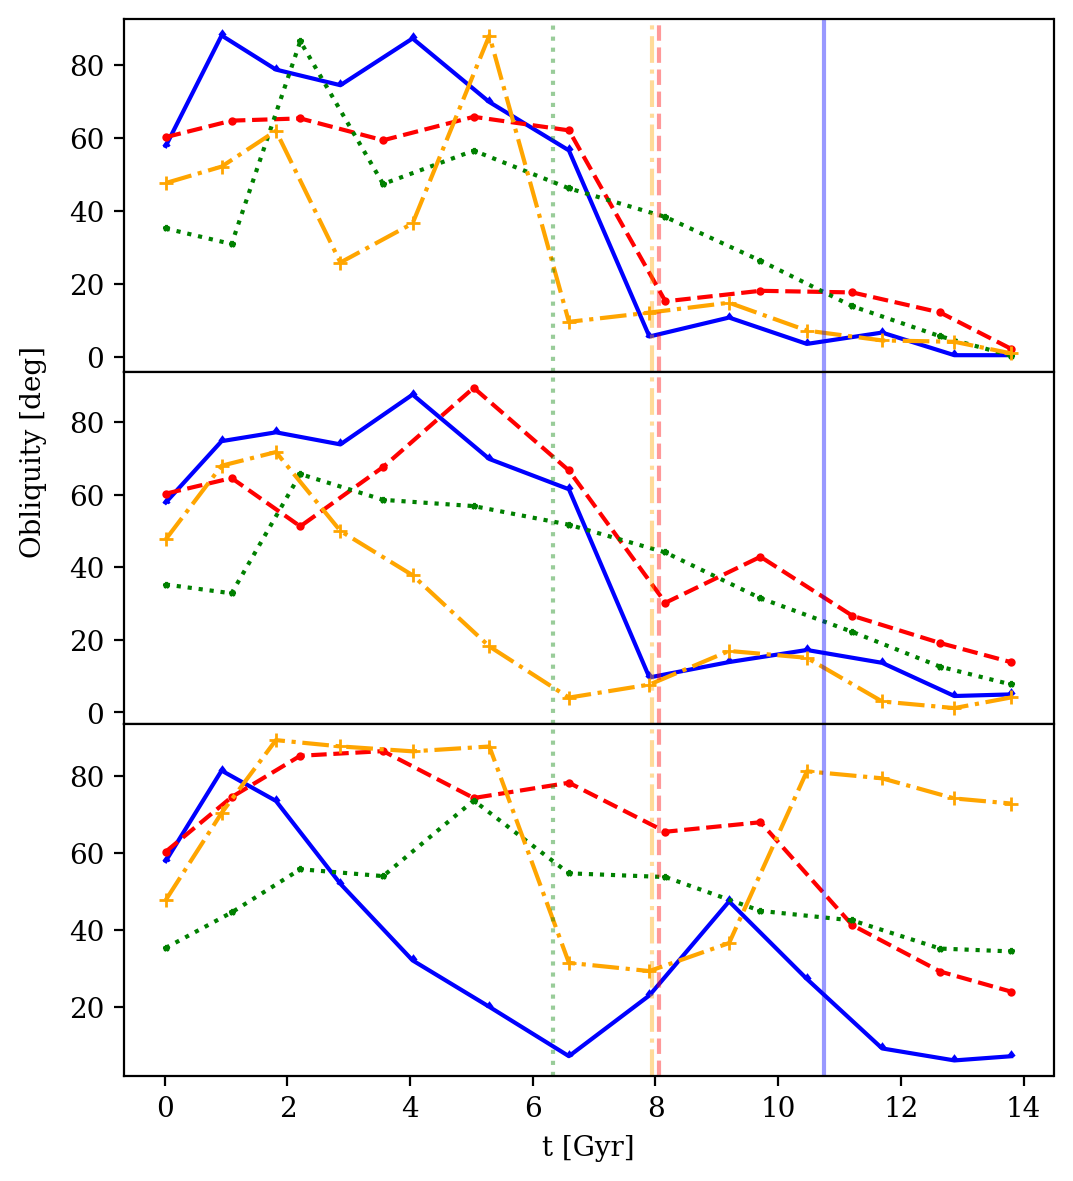

In [5]:
m12i_data = pd.read_hdf("Orientations_z/data_obliquityAngles_z_m12i_res7100.h5")
m12f_data = pd.read_hdf("Orientations_z/data_obliquityAngles_z_m12f_res7100.h5")
m12w_data = pd.read_hdf("Orientations_z/data_obliquityAngles_z_m12w_res7100.h5")
m12m_data = pd.read_hdf("Orientations_z/data_obliquityAngles_z_m12m_res7100.h5")

fig, axs = pl.subplots(3, dpi=200, sharex=True, figsize=(6, 7))

(rs90, rs90_5, r_vir) = axs

domain = np.arange(0, 13)

rs90.plot(
    vfunc(m12f_data["snapshot"]),
    m12f_data["disk"],
    ms=2,
    c="blue",
    marker=10,
    label="m12f",
)
rs90.plot(
    vfunc(m12i_data["snapshot"]),
    m12i_data["disk"],
    ms=2,
    c="red",
    marker="o",
    label="m12i",
    ls="dashed",
)
rs90.plot(
    vfunc(m12m_data["snapshot"]),
    m12m_data["disk"],
    ms=2,
    c="green",
    marker="*",
    label="m12m",
    ls="dotted",
)
rs90.plot(
    vfunc(m12w_data["snapshot"]),
    m12w_data["disk"],
    ms=5,
    c="orange",
    marker="+",
    label="m12w",
    ls="dashdot",
)

rs90_5.plot(
    vfunc(m12f_data["snapshot"]),
    m12f_data["5.disk"],
    ms=2,
    c="blue",
    marker=10,
    label="m12f",
)
rs90_5.plot(
    vfunc(m12i_data["snapshot"]),
    m12i_data["5.disk"],
    ms=2,
    c="red",
    marker="o",
    label="m12i",
    ls="dashed",
)
rs90_5.plot(
    vfunc(m12m_data["snapshot"]),
    m12m_data["5.disk"],
    ms=2,
    c="green",
    marker="*",
    label="m12m",
    ls="dotted",
)
rs90_5.plot(
    vfunc(m12w_data["snapshot"]),
    m12w_data["5.disk"],
    ms=5,
    c="orange",
    marker="+",
    label="m12w",
    ls="dashdot",
)

r_vir.plot(
    vfunc(m12f_data["snapshot"]),
    m12f_data["virial"],
    ms=2,
    c="blue",
    marker=10,
    label="m12f",
)
r_vir.plot(
    vfunc(m12i_data["snapshot"]),
    m12i_data["virial"],
    ms=2,
    c="red",
    marker="o",
    label="m12i",
    ls="dashed",
)
r_vir.plot(
    vfunc(m12m_data["snapshot"]),
    m12m_data["virial"],
    ms=2,
    c="green",
    marker="*",
    label="m12m",
    ls="dotted",
)
r_vir.plot(
    vfunc(m12w_data["snapshot"]),
    m12w_data["virial"],
    ms=5,
    c="orange",
    marker="+",
    label="m12w",
    ls="dashdot",
)

r_vir.set_xlabel("t [Gyr]")
fig.text(0.05, 0.5, "Obliquity [deg]", ha="center", rotation=90)

for ax in axs:
    ax.axvline(pericenter["m12f"]["peri.t"], alpha=0.4, c="blue")
    ax.axvline(pericenter["m12i"]["peri.t"], alpha=0.4, c="red", ls="dashed")
    ax.axvline(pericenter["m12m"]["peri.t"], alpha=0.4, c="green", ls="dotted")
    ax.axvline(pericenter["m12w"]["peri.t"], alpha=0.4, c="orange", ls="dashdot")

fig.subplots_adjust(hspace=0)

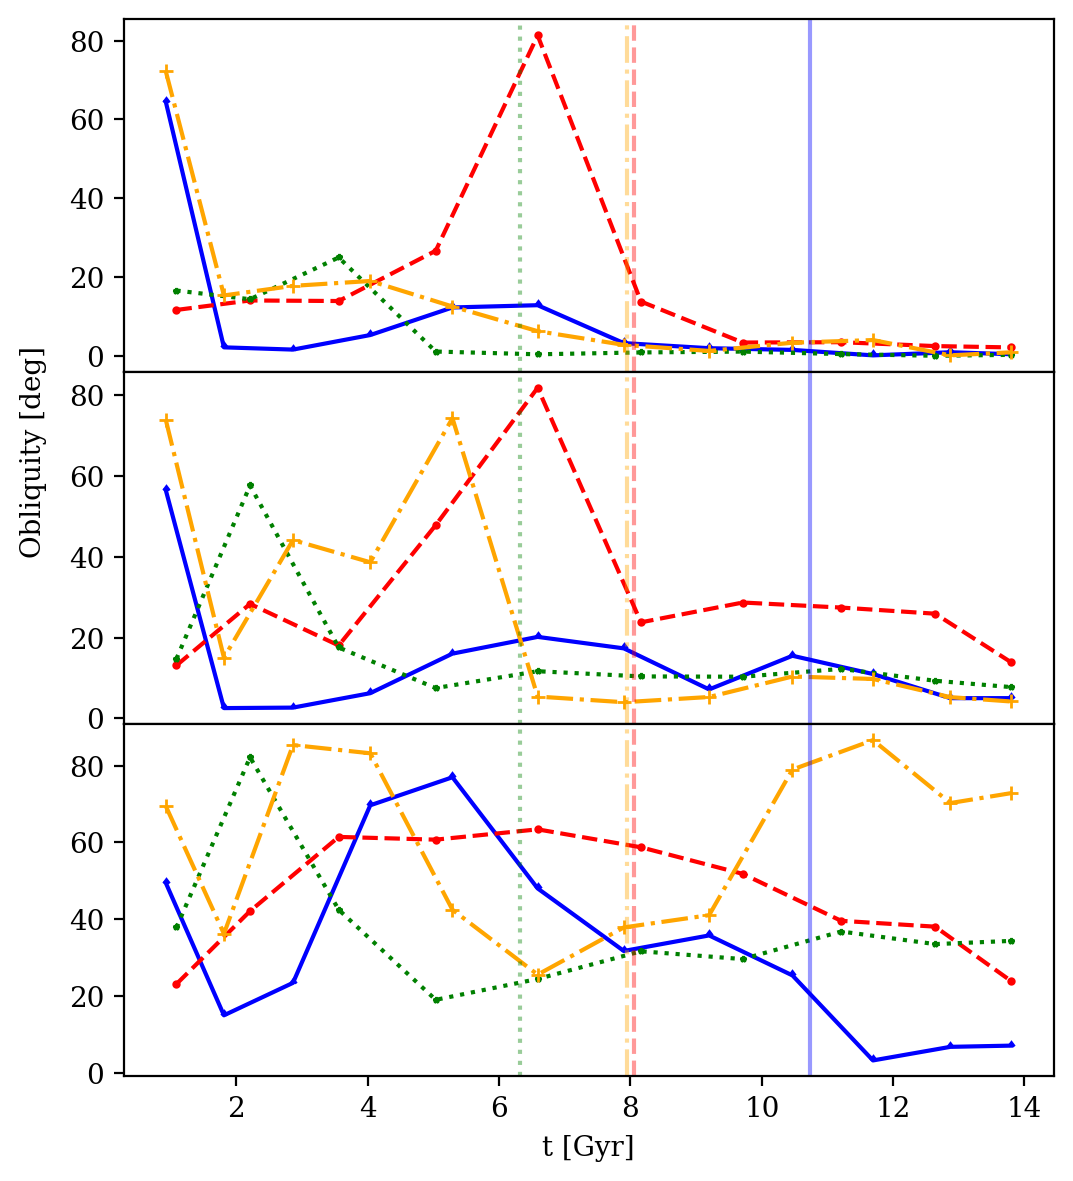

In [28]:
m12i_data = pd.read_hdf("Orientations_dyn/data_obliquityAngles_z_dyn_m12i_res7100.h5")
m12f_data = pd.read_hdf("Orientations_dyn/data_obliquityAngles_z_dyn_m12f_res7100.h5")
m12w_data = pd.read_hdf("Orientations_dyn/data_obliquityAngles_z_dyn_m12w_res7100.h5")
m12m_data = pd.read_hdf("Orientations_dyn/data_obliquityAngles_z_dyn_m12m_res7100.h5")

fig, axs = pl.subplots(3, dpi=200, sharex=True, figsize=(6, 7))

(rs90, rs90_5, r_vir) = axs

domain = np.arange(0, 13)

rs90.plot(
    vfunc(m12f_data["snapshot"]),
    m12f_data["disk"],
    ms=2,
    c="blue",
    marker=10,
    label="m12f",
)
rs90.plot(
    vfunc(m12i_data["snapshot"]),
    m12i_data["disk"],
    ms=2,
    c="red",
    marker="o",
    label="m12i",
    ls="dashed",
)
rs90.plot(
    vfunc(m12m_data["snapshot"]),
    m12m_data["disk"],
    ms=2,
    c="green",
    marker="*",
    label="m12m",
    ls="dotted",
)
rs90.plot(
    vfunc(m12w_data["snapshot"]),
    m12w_data["disk"],
    ms=5,
    c="orange",
    marker="+",
    label="m12w",
    ls="dashdot",
)

rs90_5.plot(
    vfunc(m12f_data["snapshot"]),
    m12f_data["5.disk"],
    ms=2,
    c="blue",
    marker=10,
    label="m12f",
)
rs90_5.plot(
    vfunc(m12i_data["snapshot"]),
    m12i_data["5.disk"],
    ms=2,
    c="red",
    marker="o",
    label="m12i",
    ls="dashed",
)
rs90_5.plot(
    vfunc(m12m_data["snapshot"]),
    m12m_data["5.disk"],
    ms=2,
    c="green",
    marker="*",
    label="m12m",
    ls="dotted",
)
rs90_5.plot(
    vfunc(m12w_data["snapshot"]),
    m12w_data["5.disk"],
    ms=5,
    c="orange",
    marker="+",
    label="m12w",
    ls="dashdot",
)

r_vir.plot(
    vfunc(m12f_data["snapshot"]),
    m12f_data["virial"],
    ms=2,
    c="blue",
    marker=10,
    label="m12f",
)
r_vir.plot(
    vfunc(m12i_data["snapshot"]),
    m12i_data["virial"],
    ms=2,
    c="red",
    marker="o",
    label="m12i",
    ls="dashed",
)
r_vir.plot(
    vfunc(m12m_data["snapshot"]),
    m12m_data["virial"],
    ms=2,
    c="green",
    marker="*",
    label="m12m",
    ls="dotted",
)
r_vir.plot(
    vfunc(m12w_data["snapshot"]),
    m12w_data["virial"],
    ms=5,
    c="orange",
    marker="+",
    label="m12w",
    ls="dashdot",
)

r_vir.set_xlabel("t [Gyr]")
fig.text(0.05, 0.5, "Obliquity [deg]", ha="center", rotation=90)

for ax in axs:
    ax.axvline(pericenter["m12f"]["peri.t"], alpha=0.4, c="blue")
    ax.axvline(pericenter["m12i"]["peri.t"], alpha=0.4, c="red", ls="dashed")
    ax.axvline(pericenter["m12m"]["peri.t"], alpha=0.4, c="green", ls="dotted")
    ax.axvline(pericenter["m12w"]["peri.t"], alpha=0.4, c="orange", ls="dashdot")

fig.subplots_adjust(hspace=0)